In [3]:
from data_tidy import read_a_season,read_all_game

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [5]:
read_a_season("../nhl_data/",2016).to_csv('./tidy_{season}.csv'.format(season=2016), sep=',',index=False)

100%|███████████████████████████████████████████| 6433/6433 [00:23<00:00, 276.60it/s]


In [6]:
result = pd.DataFrame()
for i in [2018,2019,2020]:
    temp = read_a_season("../nhl_data/",i)
    result = pd.concat([result,temp],ignore_index=True)
result.to_csv('./tidy_{season}.csv'.format(season="2018-2020"), sep=',',index=False)

100%|███████████████████████████████████████████| 6433/6433 [00:14<00:00, 431.43it/s]


In [7]:
season_2016_path = "./tidy_2016.csv"
season_20182020_path = "./tidy_2018-2020.csv"

In [8]:
df_2016 = pd.read_csv(season_2016_path).reset_index()
df_2016.head(10)

,index,game_id,event_idx,play_type,shot_type,shot_dist,game_time,goals_home,goals_away,attack_team_name,period,period_time_rem,coordinate,shooter_name,goalie_name,empty_Net,strength
0,0,2016020594,5,Shot,Wrist Shot,57.775427,2017-01-08T00:00:00Z,0,0,Montréal Canadiens,1,19:45,"{'x': 36.0, 'y': -23.0}",Shea Weber,Frederik Andersen,NaN,NaN
1,1,2016020594,6,Goal,Wrist Shot,26.000000,2017-01-08T00:00:00Z,0,1,Montréal Canadiens,1,19:40,"{'x': 63.0, 'y': 0.0}",Max Pacioretty,Frederik Andersen,False,EVEN
2,2,2016020594,14,Shot,Tip-In,10.000000,2017-01-08T00:00:00Z,0,1,Montréal Canadiens,1,17:59,"{'x': 79.0, 'y': 0.0}",Michael McCarron,Frederik Andersen,NaN,NaN
3,3,2016020594,16,Shot,Wrist Shot,25.612497,2017-01-08T00:00:00Z,0,1,Toronto Maple Leafs,1,17:26,"{'x': -69.0, 'y': -16.0}",Leo Komarov,Carey Price,NaN,NaN
4,4,2016020594,17,Shot,Wrist Shot,28.635642,2017-01-08T00:00:00Z,0,1,Toronto Maple Leafs,1,17:15,"{'x': -63.0, 'y': -12.0}",Nazem Kadri,Carey Price,NaN,NaN
5,5,2016020594,19,Goal,Snap Shot,17.492856,2017-01-08T00:00:00Z,0,2,Montréal Canadiens,1,16:13,"{'x': 74.0, 'y': -9.0}",Artturi Lehkonen,Frederik Andersen,False,EVEN
6,6,2016020594,26,Shot,Snap Shot,43.566042,2017-01-08T00:00:00Z,0,2,Montréal Canadiens,1,14:19,"{'x': 66.0, 'y': 37.0}",Max Pacioretty,Frederik Andersen,NaN,NaN
7,7,2016020594,27,Shot,Snap Shot,20.099751,2017-01-08T00:00:00Z,0,2,Montréal Canadiens,1,14:00,"{'x': 69.0, 'y': -2.0}",Alexander Radulov,Frederik Andersen,NaN,NaN
8,8,2016020594,31,Shot,Snap Shot,57.628118,2017-01-08T00:00:00Z,0,2,Montréal Canadiens,1,12:39,"{'x': 44.0, 'y': 36.0}",Mark Barberio,Frederik Andersen,NaN,NaN
9,9,2016020594,38,Goal,Snap Shot,13.038405,2017-01-08T00:00:00Z,1,2,Toronto Maple Leafs,1,11:35,"{'x': -76.0, 'y': -1.0}",Tyler Bozak,Carey Price,False,PPG


In [9]:
df_2016_shots = df_2016.groupby(["attack_team_name","shot_type"]).agg("count").reset_index()
df_2016_shots = df_2016_shots.pivot(columns = "attack_team_name",index = "shot_type", values = "index")
df_2016_total = pd.DataFrame(df_2016_shots.sum(axis=1),columns = ["total_shot"])
df_2016_total

,total_shot
shot_type,
Backhand,6560
Deflected,1005
Slap Shot,13520
Snap Shot,12733
Tip-In,3980
Wrap-around,843
Wrist Shot,41737


In [10]:
df_2016_goals = df_2016[df_2016["play_type"]=="Goal"]
df_2016_goals = df_2016_goals.groupby(["attack_team_name","shot_type"]).agg("count").reset_index()
df_2016_goals = df_2016_goals.pivot(columns = "attack_team_name",index = "shot_type", values = "index")
df_2016_goals_total = pd.DataFrame(df_2016_goals.sum(axis=1),columns = ["total_goal"]).astype(int)
df_2016_goals_total

,total_goal
shot_type,
Backhand,698
Deflected,199
Slap Shot,829
Snap Shot,1172
Tip-In,713
Wrap-around,70
Wrist Shot,3681


In [11]:
df_pt1 = pd.concat([df_2016_goals_total,df_2016_total],axis = 1)
df_pt1["percentage"] = df_pt1["total_goal"]/df_pt1["total_shot"]*100
df_pt1["percentage"] = df_pt1["percentage"].round(1)
df_pt1

,total_goal,total_shot,percentage
shot_type,,,
Backhand,698,6560,10.6
Deflected,199,1005,19.8
Slap Shot,829,13520,6.1
Snap Shot,1172,12733,9.2
Tip-In,713,3980,17.9
Wrap-around,70,843,8.3
Wrist Shot,3681,41737,8.8


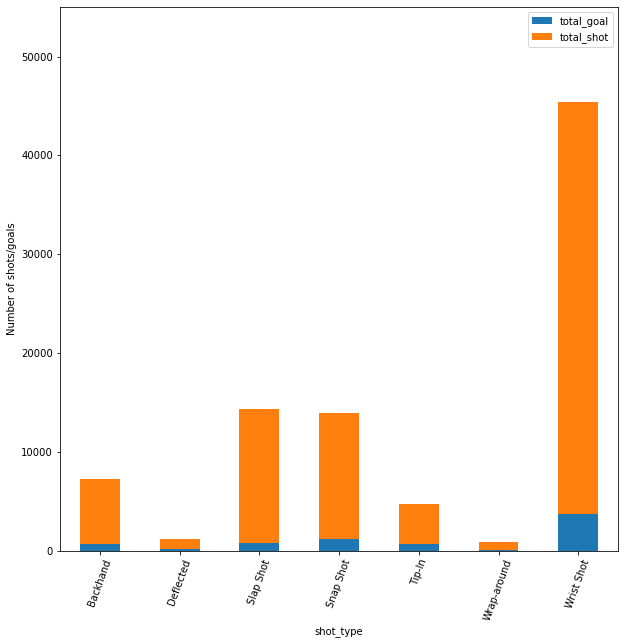

In [16]:
ax = df_pt1[["total_goal","total_shot"]].plot.bar(stacked=True,rot=70,figsize=(10, 10))
ax.set_ylim(0,55000)
plt.ylabel("Number of shots/goals")
plt.show()

In [17]:
df_1820 = pd.read_csv(season_20182020_path).reset_index()
df_1820.head(10)
# df_1820[df_1820["shot_dist"]>185]

,index,game_id,event_idx,play_type,shot_type,shot_dist,game_time,goals_home,goals_away,attack_team_name,period,period_time_rem,coordinate,shooter_name,goalie_name,empty_Net,strength
0,0,2018020811,6,Shot,Snap Shot,59.908263,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,18:22,"{'x': -39.0, 'y': -33.0}",Riley Sheahan,Jordan Binnington,NaN,NaN
1,1,2018020811,15,Shot,Snap Shot,47.885280,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,17:15,"{'x': -47.0, 'y': 23.0}",Colton Sceviour,Jordan Binnington,NaN,NaN
2,2,2018020811,17,Shot,Snap Shot,12.083046,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,16:35,"{'x': -78.0, 'y': 5.0}",Aleksander Barkov,Jordan Binnington,NaN,NaN
3,3,2018020811,21,Shot,Snap Shot,51.662365,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,16:28,"{'x': -39.0, 'y': -13.0}",Jonathan Huberdeau,Jordan Binnington,NaN,NaN
4,4,2018020811,29,Shot,Backhand,34.539832,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,14:47,"{'x': -76.0, 'y': -32.0}",MacKenzie Weegar,Jordan Binnington,NaN,NaN
5,5,2018020811,34,Shot,Snap Shot,13.038405,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,14:07,"{'x': -82.0, 'y': -11.0}",Jayce Hawryluk,Jordan Binnington,NaN,NaN
6,6,2018020811,39,Shot,Wrist Shot,14.560220,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,13:09,"{'x': -85.0, 'y': 14.0}",Aleksander Barkov,Jordan Binnington,NaN,NaN
7,7,2018020811,41,Shot,Slap Shot,167.011976,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,12:45,"{'x': 78.0, 'y': 2.0}",Aaron Ekblad,Jordan Binnington,NaN,NaN
8,8,2018020811,46,Shot,Backhand,10.295630,2019-02-06T00:00:00Z,0,0,St. Louis Blues,1,10:52,"{'x': 80.0, 'y': 5.0}",Zach Sanford,James Reimer,NaN,NaN
9,9,2018020811,50,Shot,Snap Shot,58.137767,2019-02-06T00:00:00Z,0,0,Florida Panthers,1,10:12,"{'x': -37.0, 'y': -26.0}",Keith Yandle,Jordan Binnington,NaN,NaN


In [18]:
df_1820_dist = df_1820[["shot_dist","play_type"]]
idx = ~pd.isna(df_1820_dist["shot_dist"])
df_1820_filtered = df_1820_dist.loc[idx].sort_values('shot_dist')
df_1820_filtered

,shot_dist,play_type
65856,1.000000,Goal
179378,1.000000,Goal
198025,1.000000,Shot
24962,1.000000,Goal
196613,1.414214,Shot
...,...,...
194009,188.023935,Shot
98368,188.023935,Goal
77668,188.382589,Shot
84968,188.409129,Shot


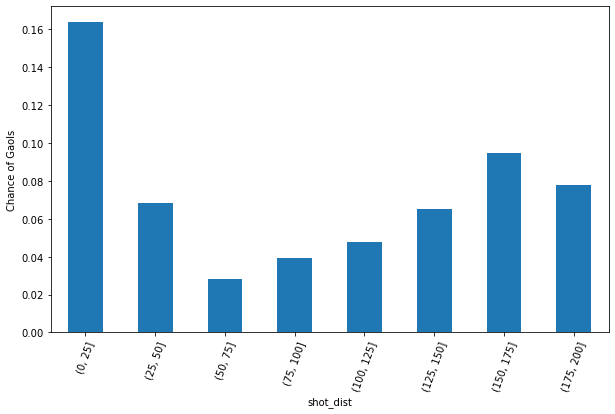

In [95]:
df_dist = df_1820_filtered[["play_type","shot_dist"]]
max_dist = np.sqrt((100*2)**2+42.5**2)
bins=list(range(0,round(max_dist),25))
df_1820_filtered_shot = df_1820_filtered #[df_1820_filtered["play_type"]=="Shot"]
df_1820_filtered_goal = df_1820_filtered[df_1820_filtered["play_type"]=="Goal"]
shot_count=pd.DataFrame(pd.cut(df_1820_filtered_shot["shot_dist"],bins=bins)).reset_index()
shot_count= shot_count.groupby("shot_dist").agg("count")
shot_count = shot_count.rename(columns={'index': 'Shots'})

goal_count=pd.DataFrame(pd.cut(df_1820_filtered_goal["shot_dist"],bins=bins)).reset_index()
goal_count= goal_count.groupby("shot_dist").agg("count")
goal_count = goal_count.rename(columns={'index': 'Goals'})

shot_goal_1820 = pd.concat([shot_count,goal_count],axis=1)
shot_goal_1820["Percentage"] = shot_goal_1820["Goals"]/shot_goal_1820["Shots"]
shot_goal_1820["Percentage"].plot.bar(rot=70,figsize=(10, 6))

plt.ylabel("Chance of Gaols")
plt.show()

In [96]:
df_1820_whole = df_1820[["shot_dist","play_type","shot_type"]]
idx = ~pd.isna(df_1820_dist["shot_dist"])
df_1820_whole = df_1820_whole.loc[idx].sort_values('shot_dist')
df_1820_whole

,shot_dist,play_type,shot_type
65856,1.000000,Goal,Deflected
179378,1.000000,Goal,Wrist Shot
198025,1.000000,Shot,Wrist Shot
24962,1.000000,Goal,Wrist Shot
196613,1.414214,Shot,Wrist Shot
...,...,...,...
194009,188.023935,Shot,Wrist Shot
98368,188.023935,Goal,Wrist Shot
77668,188.382589,Shot,Wrist Shot
84968,188.409129,Shot,Snap Shot


In [103]:
df_1820_whole_shot = df_1820_whole.groupby(["shot_dist","shot_type"]).agg("count").reset_index()
df_1820_whole_shot = df_1820_whole_shot.pivot(index = "shot_dist",columns = "shot_type",values = "play_type").fillna(0).astype(int).reset_index()
df_1820_whole_shot["intervals_play_dist"]= pd.cut(df_1820_whole_shot["shot_dist"],bins=bins)
df_1820_whole_shot = df_1820_whole_shot.groupby("intervals_play_dist").agg("sum")
df_1820_whole_shot = df_1820_whole_shot[["Backhand","Deflected","Slap Shot","Snap Shot","Tip-In","Wrap-around","Wrist Shot"]]
df_1820_whole_shot

shot_type,Backhand,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot
intervals_play_dist,,,,,,,
"(0, 25]",12834,3187,1550,7516,9397,1939,39567
"(25, 50]",2289,382,11824,14951,619,14,47550
"(50, 75]",384,255,15098,5030,422,6,20672
"(75, 100]",345,140,610,265,234,0,2888
"(100, 125]",81,25,181,114,47,0,1053
"(125, 150]",94,17,369,269,22,0,1677
"(150, 175]",285,66,247,355,157,13,2049
"(175, 200]",50,2,78,58,7,25,655


In [104]:
df_1820_whole_goal = df_1820_whole[df_1820_whole["play_type"]=="Goal"].groupby(["shot_dist","shot_type"]).agg("count").reset_index()
df_1820_whole_goal = df_1820_whole_goal.pivot(index = "shot_dist",columns = "shot_type",values = "play_type").fillna(0).astype(int).reset_index()
df_1820_whole_goal["intervals_play_dist"]= pd.cut(df_1820_whole_goal["shot_dist"],bins=bins)
df_1820_whole_goal = df_1820_whole_goal.groupby("intervals_play_dist").agg("sum")
df_1820_whole_goal = df_1820_whole_goal[["Backhand","Deflected","Slap Shot","Snap Shot","Tip-In","Wrap-around","Wrist Shot"]]
df_1820_whole_goal

shot_type,Backhand,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot
intervals_play_dist,,,,,,,
"(0, 25]",1723,553,344,1504,1752,137,6449
"(25, 50]",67,58,1077,1201,70,1,2840
"(50, 75]",9,20,522,120,19,0,478
"(75, 100]",15,0,7,12,0,0,141
"(100, 125]",5,0,2,5,3,0,57
"(125, 150]",2,0,29,20,3,0,106
"(150, 175]",32,12,28,43,30,1,154
"(175, 200]",3,1,2,6,3,0,53


In [105]:
df_1820_q3 = df_1820_whole_goal/df_1820_whole_shot
df_1820_q3

shot_type,Backhand,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot
intervals_play_dist,,,,,,,
"(0, 25]",0.134253,0.173517,0.221935,0.200106,0.186442,0.070655,0.162989
"(25, 50]",0.029270,0.151832,0.091086,0.080329,0.113086,0.071429,0.059727
"(50, 75]",0.023438,0.078431,0.034574,0.023857,0.045024,0.000000,0.023123
"(75, 100]",0.043478,0.000000,0.011475,0.045283,0.000000,NaN,0.048823
"(100, 125]",0.061728,0.000000,0.011050,0.043860,0.063830,NaN,0.054131
"(125, 150]",0.021277,0.000000,0.078591,0.074349,0.136364,NaN,0.063208
"(150, 175]",0.112281,0.181818,0.113360,0.121127,0.191083,0.076923,0.075159
"(175, 200]",0.060000,0.500000,0.025641,0.103448,0.428571,0.000000,0.080916


<AxesSubplot:xlabel='shot_type', ylabel='intervals_play_dist'>

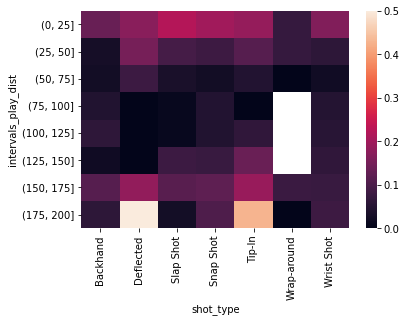

In [106]:
seaborn.heatmap(df_1820_q3)